# load iridium data and process

In [1]:
import glob

# cognac data and tools
import cognac.insitu as insi

---
## load and select data

In [3]:
# data directory and filename
#
#campaign = 'microco_leg2.yaml'
campaign = 'lopstech19_leg1.yaml'

cp = insi.utils.campaign(campaign)
data_dir = cp.path+'iridium/'

imeis={unit: cp[unit]['iridium'] for unit in ['source', 'enregistreur']}

In [4]:
iridium={u: {} for u in imeis} 
for u, imei in imeis.items():
    g = insi.balise_iridium.analyse_sbd(imei, sbd_dir=data_dir)
    for d in cp[u]:
        lg = g.trim(d.start.time, d.end.time, inplace=False)
        if lg.d.empty:
            iridium[u][d.label] = None
        else:
            iridium[u][d.label] = lg

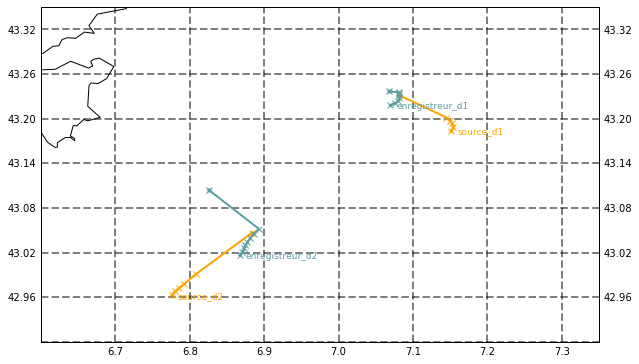

In [7]:
fig, ax, crs = insi.utils.plot_map(cp=cp)
for u, udat in iridium.items():
    for d, g in udat.items():
        if g:
            g.plot(ax, label=u+'_'+d, marker='x', color=cp[u]['color'])

---
## store

In [12]:
# load with
for u, udat in iridium.items():
    for d, g in udat.items():
        if g:
            g.to_pickle(cp.pathp+'iridium_'+u+'_'+d+'.p')

Data store to /Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg1/data/datap/iridium_source_d1.p
Data store to /Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg1/data/datap/iridium_source_d2.p
Data store to /Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg1/data/datap/iridium_enregistreur_d1.p
Data store to /Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg1/data/datap/iridium_enregistreur_d2.p
